In [5]:
#ライブラリの読み込み
import matplotlib.pyplot as plt
%matplotlib inline

# 【問題1】100日目の米粒の数
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。

また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。

（縦軸が米の数、横軸が日数）

100日目には合計で 6.34e+29 米粒をもらっている。


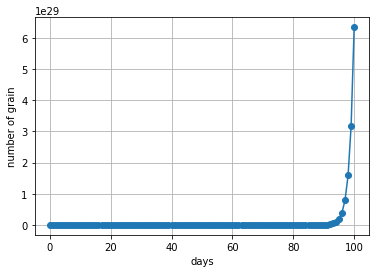

In [6]:
#1日目から100日目までの「その日にもらう米の数」
list_n_grain = [2**i for i in range(100)]
#リストのインデックスと日数をあわせるために0日目の米粒を追加
list_n_grain.insert(0, 0)

#100日目には合計で米粒をいくつもらっているのか出力
print("100日目には合計で {:.2e} 米粒をもらっている。".format(list_n_grain[100]))

#折れ線グラフ描画
plt.ylabel("number of grain")
plt.xlabel("days")
plt.grid()
plt.plot(list_n_grain, marker="o")
plt.show()

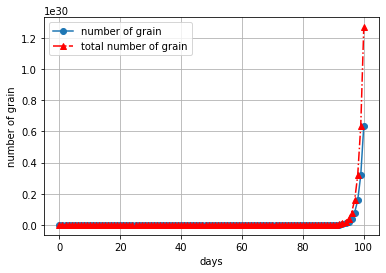

In [7]:
#1日目から100日目までの「その日までに累計で貰う米の数」
list_total_grains = []
total_grains = 0

for i in list_n_grain:
    total_grains += i
    list_total_grains.append(total_grains)

#折れ線グラフ描画
plt.plot(list_n_grain, marker="o", label="number of grain")
plt.plot(list_total_grains, marker="^", c="r", label="total number of grain", ls="-.")
plt.ylabel("number of grain")
plt.xlabel("days")
plt.legend()
plt.grid()
plt.show()

# 【問題2】100日目以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。

関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。


以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。

参考にして、自分なりにも分かりやすくコメントを書き換えてください。

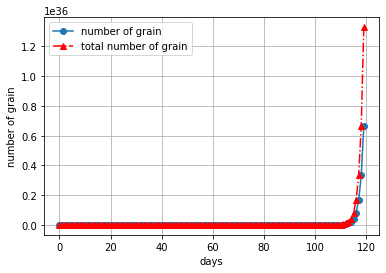

In [8]:
#関数作成
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    list_n_grains = [2 ** i for i in range(day)]
    list_total_grains = [sum(list_n_grains[:i+1]) for i in range(day)]
    return list_n_grains, list_total_grains

#コースの受講日数
attending_days = 95
list_n_grains, list_total_grains = compute_sorori_shinzaemon(attending_days)

#折れ線グラフ
plt.plot(list_n_grains, marker="o", label="number of grain")
plt.plot(list_total_grains, marker="^", c="r", label="total number of grain", ls="-.")
plt.ylabel("number of grain")
plt.xlabel("days")
plt.legend()
plt.grid()
plt.show()


# 【問題3】何人が何日生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成してください。

コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。

自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

### <u>  計算過程について  </u>

ここでは、「成人男性が１日に必要なカロリー」を各人が毎日満たせば、問題なく生活が可能であると前提を仮定する。

上記の仮定において、「成人男性が１日生活するために必要な米粒」は以下の計算式①によって求まる。

　　　　　<b>① （成人男性が１日生活するために必要な米粒）＝（成人男性が１日に必要なカロリー）　÷　（米１粒あたりのカロリー）</b>

よって、最終的に求めたい「コース受講期間内で受講メンバー全員が生活できる日数」は以下の計算式②を計算するとよい。

　　　　　<b>② （コース受講期間内で受講メンバー全員が生活できる日数）　＝（コース受講日数）　×　（受講人数）</b>

各パラメータ値は以下URLを参考として設定する

成人男性が１日に必要なカロリー：約2200Kcal (https://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html) <br>
米１粒あたりのカロリー：約0.072cal (http://dorisyamoji.seesaa.net/article/425381046.html) <br>
コース受講日数：95日 (https://diveintocode.jp/ai_curriculum#curriculum) <br>
受講人数：13人


In [20]:
def compute_days_to_live(n_grant, n_person): 
    """
    米粒の数と人数を与え、全員が何日間生活が可能かを計算する
    
    Parameters
    -------------
    n_grant: int
        米粒の数
    n_person: int
        人数
        
    Returns
    -------------
    days_to_live: int
        生活可能な日数


    """
    CALORIES_ONE_DAY   = 2200                                     # 成人男性が１日に必要なカロリー 2200 kcal
    CALORIES_PER_GRANT = 0.072                                    # 米１粒あたりのカロリー  0.072 Kcal
    GRANT_LIVE_ONE_DAY = CALORIES_ONE_DAY // CALORIES_PER_GRANT   # 計算式①
    days_to_live = n_grant // (GRANT_LIVE_ONE_DAY * n_person)     # 計算式②
    return days_to_live

attending_days = 95 # コース受講日数
n_grant = list_total_grains[attending_days] # 95日間でもらえる米粒の数
n_person = 13 # 受講人数
print("コース受講日数 {} 日間でもらえる、お米 {:,} 粒で {} 人が {:,} 日生活できます。".format(attending_days, n_grant, n_person, compute_days_to_live(n_grant, n_person)))


コース受講日数 95 日間でもらえる、お米 79,228,162,514,264,337,593,543,950,335 粒で 13 人が 1.994591405517524e+23 日生活できます。
